# Machine Learning Mini Project - 3


Attributes:
1. URL - Website of the Zomato for each restaurant. - Object datatype
2. Address - Address of the Restaurant. - Object datatype
3. Name - Name of the restaurant. - Object datatype
4. Online Order - The customer ordered the menu online or not. - Object datatype
5. Book table - The customer has booked the table or not. - Object datatype
6. Rate - Rating of the restaurant that has by the customer. - Numerical datatype
7. Votes - The votes have been given by the customer to the restaurant. - Numerical
datatype
8. Phone - Contact number of the Restaurant. - Object datatype
9. Location - The city name where the restaurant is located. - Object datatype
10. Rest Type - The type of restaurant. - Object datatype
11. Dish liked - Dishes liked by the customer from the restaurant. - Object datatype
12. Cuisines - The cuisines that have been prepared by the restaurant. - Object datatype
13. Approx Cost for two people - The approximate cost of the customer for 2 people. -
Number datatype
14. Reviews list - The reviews made by the customers on the restaurant. - Object
datatype
15. Menu Item - The menu items that are usually available at the restaurant. - Object
datatype
16. Listed in (type) - Contains the type of the meal. - Object datatype
17. Listed in (city) - This contains the neighborhood in which the restaurant is listed. -
Object datatype

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics


In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
df[df.duplicated()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


## Problem A predicting the price for two customers

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [8]:
df1 = df.copy()

In [9]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
df.dish_liked.value_counts()

Biryani                                                                                              182
Chicken Biryani                                                                                       73
Friendly Staff                                                                                        69
Waffles                                                                                               68
Paratha                                                                                               57
                                                                                                    ... 
Butter Chicken, Shawarma Roll, Chicken Shawarama, Chicken Grill, Rolls, Al Faham Chicken, Biryani      1
Filter Coffee, Sandwich, Bonda, Vada, Masala Dosa, Salad, Aloo Curry                                   1
Burgers, Fries, Jumbo Royale Burger, Salads, Peri Peri Chicken Salad, Potato Wedges, Rolls             1
Chaat, Pav Bhaji, Raj Kachori, Buttermilk, Ajwaini Para

In [11]:
# since for prediction we are assuming that the name, address,url,phone,location,dished like are redudant varaibles

In [12]:
df1.drop(columns = ['url', 'address', 'name','phone', 'location','dish_liked'],inplace=True)

In [13]:
df1

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6 /5,27,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,No,No,NaN,0,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,No,No,NaN,0,Bar,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,No,Yes,4.3 /5,236,Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# Eda

In [14]:
a = df['online_order'].value_counts()

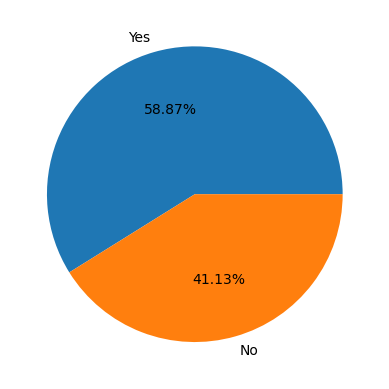

In [15]:
plt.pie(df['online_order'].value_counts(),labels=a.index,autopct='%0.2f%%')
plt.show()

In [16]:
# 58.87 % of restruants offers online orders

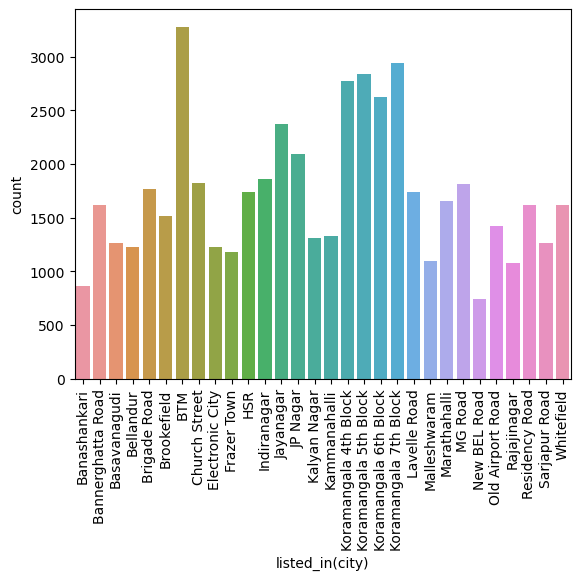

In [17]:
sns.countplot(df['listed_in(city)'])
plt.xticks(rotation = 90)
plt.show()

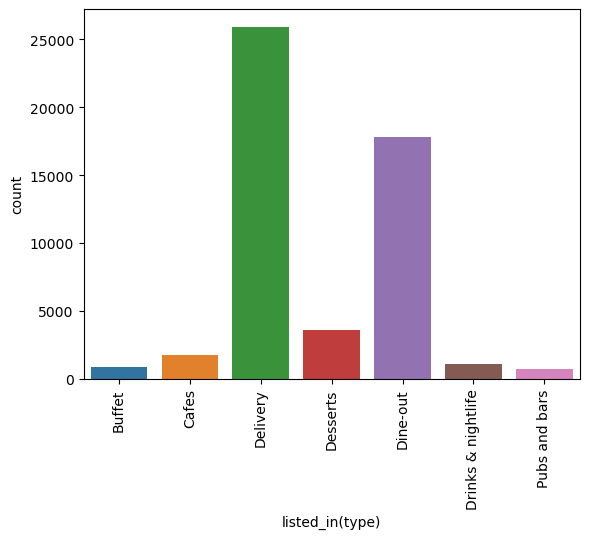

In [18]:
sns.countplot(df['listed_in(type)'])
plt.xticks(rotation = 90)
plt.show()

In [19]:
pd.crosstab(df1['online_order'],df1['listed_in(type)'],margins=True)

listed_in(type),Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars,All
online_order,,,,,,,,
No,528,825,7071,1944,9534,864,507,21273
Yes,354,898,18871,1649,8245,237,190,30444
All,882,1723,25942,3593,17779,1101,697,51717


In [20]:
# out of all categories 
# we can see how many offers 

<AxesSubplot:xlabel='online_order'>

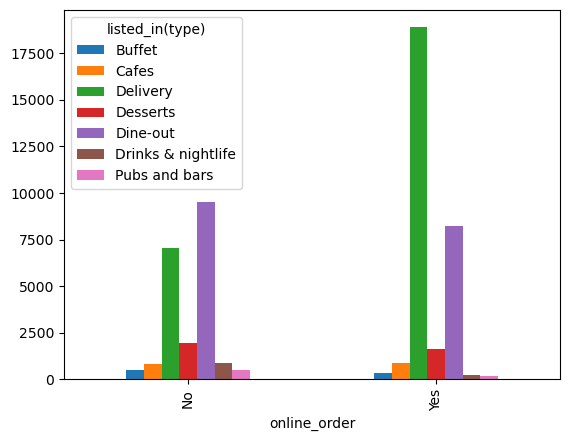

In [21]:
pd.crosstab(df1['online_order'],df1['listed_in(type)']).plot(kind ='bar')

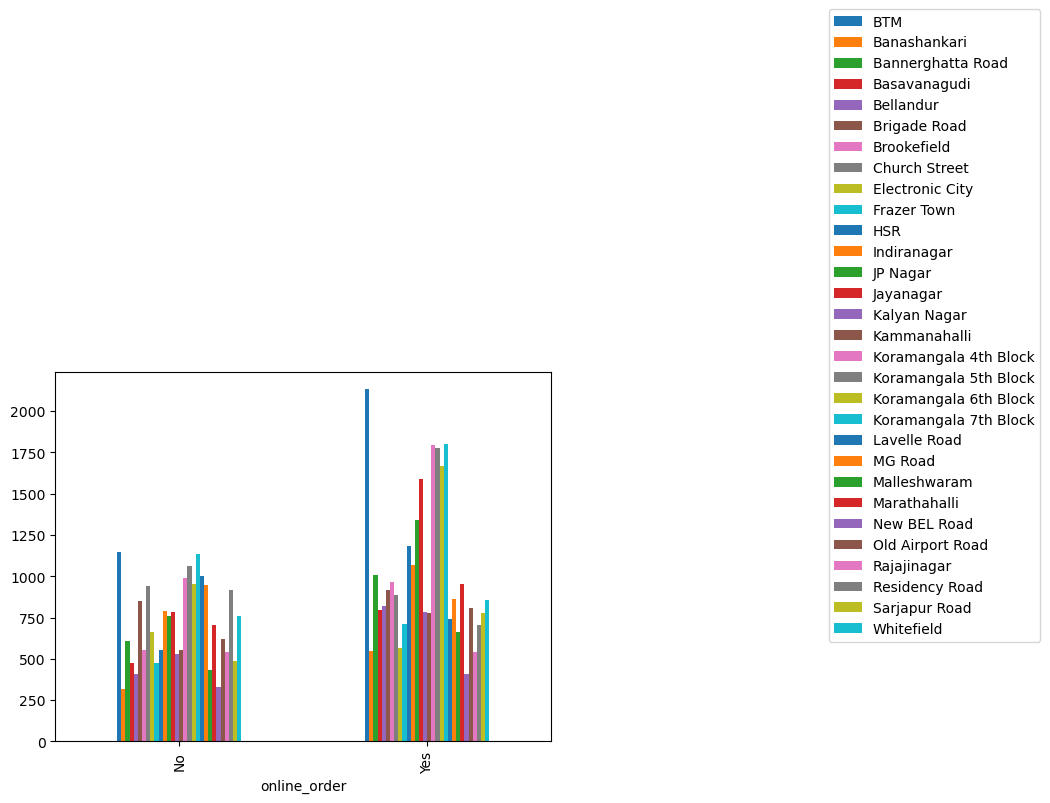

In [22]:
pd.crosstab(df1['online_order'],df1['listed_in(city)']).plot(kind ='bar')
plt.legend(loc='upper right', bbox_to_anchor=(2.0, 2.0))


In [23]:
df1

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6 /5,27,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,No,No,NaN,0,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,No,No,NaN,0,Bar,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,No,Yes,4.3 /5,236,Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [24]:
df1.isna().mean()*100

online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
rest_type                       0.438927
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [25]:
# we convert rating to numeric

In [26]:
df1['rate'] =  df1['rate'].apply(lambda x : str(x).replace('/5',''))


In [27]:
df1['rate'] = df1['rate'] = pd.to_numeric(df1['rate'],errors='coerce')

In [28]:
df1.isna().sum()

online_order                       0
book_table                         0
rate                           10052
votes                              0
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51717 non-null  object 
 1   book_table                   51717 non-null  object 
 2   rate                         41665 non-null  float64
 3   votes                        51717 non-null  int64  
 4   rest_type                    51490 non-null  object 
 5   cuisines                     51672 non-null  object 
 6   approx_cost(for two people)  51371 non-null  object 
 7   reviews_list                 51717 non-null  object 
 8   menu_item                    51717 non-null  object 
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.3+ MB


<AxesSubplot:xlabel='listed_in(city)'>

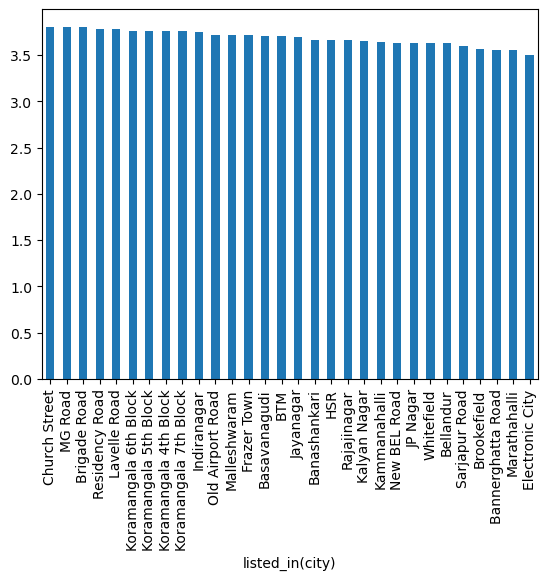

In [30]:
df1.groupby('listed_in(city)')['rate'].mean().sort_values(ascending =False).plot(kind ='bar')


In [31]:
# max rating at church street least at electronic city 

<AxesSubplot:xlabel='listed_in(type)'>

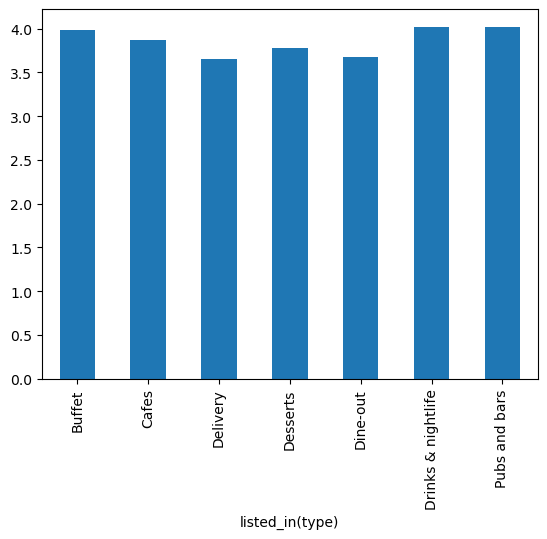

In [32]:
df1.groupby('listed_in(type)')['rate'].mean().plot(kind ='bar')

In [33]:
df1

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Bar,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,No,No,NaN,0,Bar,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,No,No,NaN,0,Bar,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,No,Yes,4.3,236,Bar,Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


<AxesSubplot:>

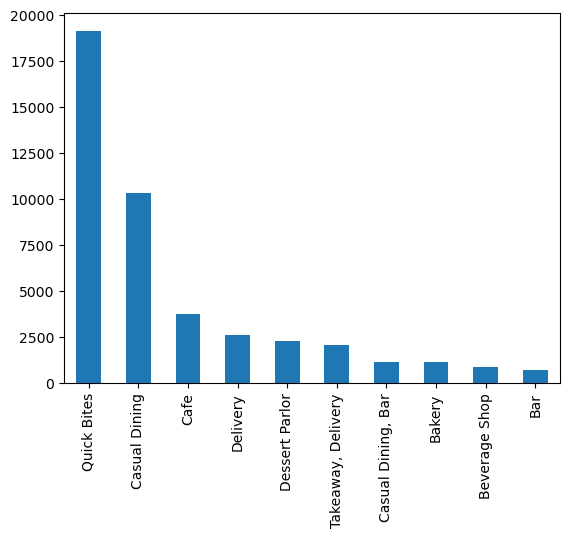

In [34]:
df1.rest_type.value_counts()[:10].plot(kind ='bar')

In [35]:
#quick bites is most frequent type of restruants
#


In [36]:
df1.head(3)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [37]:
df1.groupby('rest_type')['rate'].mean()

rest_type
Bakery                        3.607955
Bakery, Beverage Shop         3.200000
Bakery, Cafe                  4.009722
Bakery, Dessert Parlor        3.687402
Bakery, Food Court            3.100000
                                ...   
Sweet Shop                    3.626012
Sweet Shop, Dessert Parlor         NaN
Sweet Shop, Quick Bites       3.610526
Takeaway                      3.407229
Takeaway, Delivery            3.513622
Name: rate, Length: 93, dtype: float64

In [38]:
df1.cuisines.value_counts()

North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2723, dtype: int64

In [39]:
df1.head(2)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [40]:
df1.drop(columns = ['reviews_list','menu_item'],inplace=True)

In [41]:
df1

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,No,No,NaN,0,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,No,No,NaN,0,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,No,Yes,4.3,236,Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [42]:
df1['approx_cost(for two people)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51717 entries, 0 to 51716
Series name: approx_cost(for two people)
Non-Null Count  Dtype 
--------------  ----- 
51371 non-null  object
dtypes: object(1)
memory usage: 404.2+ KB


In [43]:
df1['approx_cost(for two people)'].value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [44]:
df1['cost_2'] = df1['approx_cost(for two people)'].apply(lambda x : float(str(x).replace(',','')))

In [45]:
df1['cost_2'] = pd.to_numeric(df1['cost_2'],errors='coerce')

In [46]:
df1['cost_2'].isna().sum()

346

In [47]:
df1.isna().sum()

online_order                       0
book_table                         0
rate                           10052
votes                              0
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
cost_2                           346
dtype: int64

In [48]:
df1.drop(columns = 'approx_cost(for two people)',inplace=True)

In [49]:
#since our target is predicting cost we drop that null values


In [50]:
df1.dropna(subset='cost_2',inplace=True)


In [51]:
df1.isna().sum()

online_order          0
book_table            0
rate               9953
votes                 0
rest_type           204
cuisines             19
listed_in(type)       0
listed_in(city)       0
cost_2                0
dtype: int64

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51371 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     51371 non-null  object 
 1   book_table       51371 non-null  object 
 2   rate             41418 non-null  float64
 3   votes            51371 non-null  int64  
 4   rest_type        51167 non-null  object 
 5   cuisines         51352 non-null  object 
 6   listed_in(type)  51371 non-null  object 
 7   listed_in(city)  51371 non-null  object 
 8   cost_2           51371 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.9+ MB


<AxesSubplot:xlabel='rate', ylabel='cost_2'>

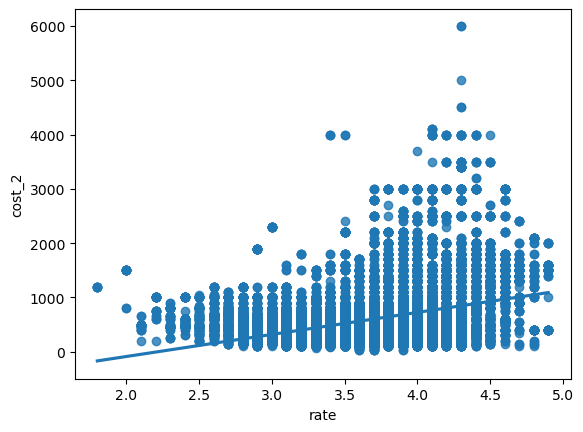

In [53]:
sns.regplot(df1['rate'],df1['cost_2'])

In [54]:
#there is not much of  a linear realtion between price and rating 
df1.isna().mean()*100

online_order        0.000000
book_table          0.000000
rate               19.374745
votes               0.000000
rest_type           0.397111
cuisines            0.036986
listed_in(type)     0.000000
listed_in(city)     0.000000
cost_2              0.000000
dtype: float64

In [55]:
df1.dropna(subset=['cuisines','rest_type'],inplace=True)

In [56]:
df1

,online_order,book_table,rate,votes,rest_type,cuisines,listed_in(type),listed_in(city),cost_2
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,Banashankari,800.0
1,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",Buffet,Banashankari,800.0
2,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,Banashankari,800.0
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",Buffet,Banashankari,300.0
4,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",Buffet,Banashankari,600.0
...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Bar,Continental,Pubs and bars,Whitefield,1500.0
51713,No,No,NaN,0,Bar,Finger Food,Pubs and bars,Whitefield,600.0
51714,No,No,NaN,0,Bar,Finger Food,Pubs and bars,Whitefield,2000.0
51715,No,Yes,4.3,236,Bar,Finger Food,Pubs and bars,Whitefield,2500.0


In [57]:
df2 = df1.copy()

In [58]:
# here i am converting this multivalue list to the first_dish thats offered

In [59]:
df2['cuisines'] = df2['cuisines'].str.split(',').str[0]

In [60]:
df2


,online_order,book_table,rate,votes,rest_type,cuisines,listed_in(type),listed_in(city),cost_2
0,Yes,Yes,4.1,775,Casual Dining,North Indian,Buffet,Banashankari,800.0
1,Yes,No,4.1,787,Casual Dining,Chinese,Buffet,Banashankari,800.0
2,Yes,No,3.8,918,"Cafe, Casual Dining",Cafe,Buffet,Banashankari,800.0
3,No,No,3.7,88,Quick Bites,South Indian,Buffet,Banashankari,300.0
4,No,No,3.8,166,Casual Dining,North Indian,Buffet,Banashankari,600.0
...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Bar,Continental,Pubs and bars,Whitefield,1500.0
51713,No,No,NaN,0,Bar,Finger Food,Pubs and bars,Whitefield,600.0
51714,No,No,NaN,0,Bar,Finger Food,Pubs and bars,Whitefield,2000.0
51715,No,Yes,4.3,236,Bar,Finger Food,Pubs and bars,Whitefield,2500.0


In [61]:
# 
df2[df2['votes'] ==0]

,online_order,book_table,rate,votes,rest_type,cuisines,listed_in(type),listed_in(city),cost_2
72,No,No,NaN,0,Quick Bites,North Indian,Delivery,Banashankari,150.0
75,No,No,NaN,0,"Takeaway, Delivery",Street Food,Delivery,Banashankari,500.0
84,No,No,NaN,0,Quick Bites,South Indian,Delivery,Banashankari,100.0
90,No,No,NaN,0,Delivery,Bakery,Delivery,Banashankari,500.0
91,No,No,NaN,0,"Takeaway, Delivery",South Indian,Delivery,Banashankari,400.0
...,...,...,...,...,...,...,...,...,...
51644,No,No,NaN,0,Quick Bites,North Indian,Dine-out,Whitefield,400.0
51675,No,No,NaN,0,Bar,Finger Food,Drinks & nightlife,Whitefield,900.0
51710,No,No,NaN,0,Bar,Finger Food,Pubs and bars,Whitefield,900.0
51713,No,No,NaN,0,Bar,Finger Food,Pubs and bars,Whitefield,600.0


In [62]:
## we will impute the rate column using location and rest_type
50,100,300,1000,5000,10000,15000

(50, 100, 300, 1000, 5000, 10000, 15000)

<AxesSubplot:xlabel='cost_2', ylabel='Count'>

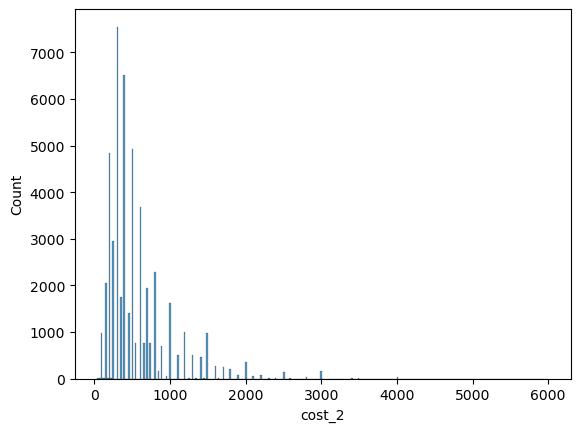

In [63]:
sns.histplot(df2['cost_2'])

In [64]:
res_type = df2['rest_type'].value_counts()

In [65]:
red_dict = {'' :res_type[res_type < 50].index.to_list(),'50&300':res_type[(res_type >= 50) | (res_type < 300)].index.to_list()
 ,'300&1000':res_type[(res_type >= 300) | (res_type < 1000)].index.to_list(),
 
 '1000&5000' : res_type[(res_type >= 1000) | (res_type < 5000)].index.to_list(),
 '5000&15000':res_type[(res_type >= 5000) | (res_type < 15000)].index.to_list(),
 '>15000':res_type[ (res_type >= 15000 )].index.to_list()}


In [66]:
# i am feature engineering a new column to make types
# here the restarunts are now divided into catgeories based on the cost at two restruants
# we can use this column instead of restraunt type since it causes curse of dimensionality

In [67]:
df2['Type_Price'] = df2['cost_2'].apply(lambda x :'<500' if x <500 else '500-1000'if x >=500 and x <1000 else '1000-3000' if x >=1000 and x <3000 
                      else '3000-5000' if x >=300 and x <5000 else'>5000' if x >=5000 else x
                                       )

In [68]:
df2['cost_2'].isna().sum()

0

In [69]:
df2['Type_Price'].value_counts()

<500         28169
500-1000     16066
1000-3000     6672
3000-5000      238
>5000            3
Name: Type_Price, dtype: int64

In [70]:
df2['Type_Price'].isna().sum()

0

<AxesSubplot:xlabel='Type_Price', ylabel='cost_2'>

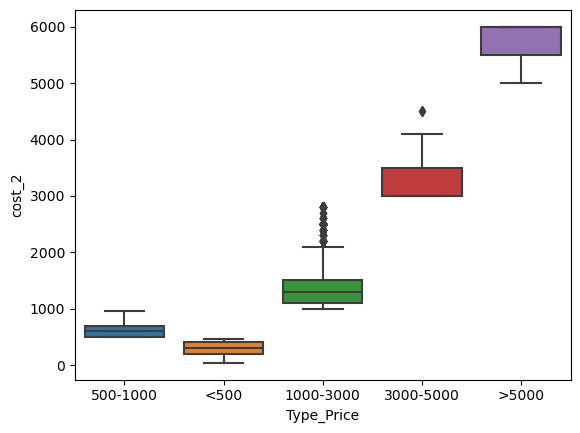

In [71]:
sns.boxplot(df2['Type_Price'],df2['cost_2'])

In [72]:
df2

,online_order,book_table,rate,votes,rest_type,cuisines,listed_in(type),listed_in(city),cost_2,Type_Price
0,Yes,Yes,4.1,775,Casual Dining,North Indian,Buffet,Banashankari,800.0,500-1000
1,Yes,No,4.1,787,Casual Dining,Chinese,Buffet,Banashankari,800.0,500-1000
2,Yes,No,3.8,918,"Cafe, Casual Dining",Cafe,Buffet,Banashankari,800.0,500-1000
3,No,No,3.7,88,Quick Bites,South Indian,Buffet,Banashankari,300.0,<500
4,No,No,3.8,166,Casual Dining,North Indian,Buffet,Banashankari,600.0,500-1000
...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Bar,Continental,Pubs and bars,Whitefield,1500.0,1000-3000
51713,No,No,NaN,0,Bar,Finger Food,Pubs and bars,Whitefield,600.0,500-1000
51714,No,No,NaN,0,Bar,Finger Food,Pubs and bars,Whitefield,2000.0,1000-3000
51715,No,Yes,4.3,236,Bar,Finger Food,Pubs and bars,Whitefield,2500.0,1000-3000


In [73]:
# since the there is ooccurance of same value in multiple formats we can go by using
#groupby cost and then put bins



since the rating is based on voting given by customers its not logical to use the observations

where vote =  0 and rate = nan

In [74]:
#imputing missing values for rate 
#

In [75]:
df2.select_dtypes(include='number').columns

Index(['rate', 'votes', 'cost_2'], dtype='object')

In [76]:
df2.isna().sum()

online_order          0
book_table            0
rate               9885
votes                 0
rest_type             0
cuisines              0
listed_in(type)       0
listed_in(city)       0
cost_2                0
Type_Price            0
dtype: int64

In [77]:
df2

,online_order,book_table,rate,votes,rest_type,cuisines,listed_in(type),listed_in(city),cost_2,Type_Price
0,Yes,Yes,4.1,775,Casual Dining,North Indian,Buffet,Banashankari,800.0,500-1000
1,Yes,No,4.1,787,Casual Dining,Chinese,Buffet,Banashankari,800.0,500-1000
2,Yes,No,3.8,918,"Cafe, Casual Dining",Cafe,Buffet,Banashankari,800.0,500-1000
3,No,No,3.7,88,Quick Bites,South Indian,Buffet,Banashankari,300.0,<500
4,No,No,3.8,166,Casual Dining,North Indian,Buffet,Banashankari,600.0,500-1000
...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Bar,Continental,Pubs and bars,Whitefield,1500.0,1000-3000
51713,No,No,NaN,0,Bar,Finger Food,Pubs and bars,Whitefield,600.0,500-1000
51714,No,No,NaN,0,Bar,Finger Food,Pubs and bars,Whitefield,2000.0,1000-3000
51715,No,Yes,4.3,236,Bar,Finger Food,Pubs and bars,Whitefield,2500.0,1000-3000


In [78]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
rate,41263.0,3.702011,0.439985,1.8,3.4,3.7,4.0,4.9
votes,51148.0,284.917885,806.495210,0.0,7.0,41.0,199.0,16832.0
cost_2,51148.0,556.043736,439.555299,40.0,300.0,400.0,700.0,6000.0


In [79]:
# i will impute the rate column based on the city and type_price

df2['rate'] = df2.groupby(['listed_in(city)','Type_Price'])['rate'].transform(lambda x :x.fillna(x.median()))

In [80]:
df2.drop(columns = ['rest_type'],inplace=True)

In [81]:
df2.Type_Price.value_counts()

<500         28169
500-1000     16066
1000-3000     6672
3000-5000      238
>5000            3
Name: Type_Price, dtype: int64

In [82]:
df2['Type_Price'] = df2['Type_Price'].map({'<500':0,'500-1000':1,'1000-3000':2,'3000-5000':3,'>5000':4})

In [83]:
df2['Type_Price']

0        1
1        1
2        1
3        0
4        1
        ..
51712    2
51713    1
51714    2
51715    2
51716    2
Name: Type_Price, Length: 51148, dtype: int64

In [84]:
df2

,online_order,book_table,rate,votes,cuisines,listed_in(type),listed_in(city),cost_2,Type_Price
0,Yes,Yes,4.1,775,North Indian,Buffet,Banashankari,800.0,1
1,Yes,No,4.1,787,Chinese,Buffet,Banashankari,800.0,1
2,Yes,No,3.8,918,Cafe,Buffet,Banashankari,800.0,1
3,No,No,3.7,88,South Indian,Buffet,Banashankari,300.0,0
4,No,No,3.8,166,North Indian,Buffet,Banashankari,600.0,1
...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Continental,Pubs and bars,Whitefield,1500.0,2
51713,No,No,3.7,0,Finger Food,Pubs and bars,Whitefield,600.0,1
51714,No,No,4.1,0,Finger Food,Pubs and bars,Whitefield,2000.0,2
51715,No,Yes,4.3,236,Finger Food,Pubs and bars,Whitefield,2500.0,2


In [85]:
df2['cuisines'].value_counts().index.to_list()

['North Indian',
 'South Indian',
 'Cafe',
 'Chinese',
 'Biryani',
 'Fast Food',
 'Bakery',
 'Desserts',
 'Continental',
 'Beverages',
 'Andhra',
 'Ice Cream',
 'Kerala',
 'Street Food',
 'Mithai',
 'Finger Food',
 'Italian',
 'Pizza',
 'Arabian',
 'American',
 'Burger',
 'Healthy Food',
 'Asian',
 'Bengali',
 'Juices',
 'Seafood',
 'Mughlai',
 'European',
 'Rolls',
 'Mangalorean',
 'Mexican',
 'Tibetan',
 'Tea',
 'Salad',
 'Thai',
 'BBQ',
 'Japanese',
 'Modern Indian',
 'Rajasthani',
 'Mediterranean',
 'Chettinad',
 'Kebab',
 'Sandwich',
 'Hyderabadi',
 'Maharashtrian',
 'Goan',
 'Momos',
 'Lebanese',
 'Oriya',
 'Bihari',
 'North Eastern',
 'Turkish',
 'Steak',
 'Korean',
 'Vietnamese',
 'Konkan',
 'Nepalese',
 'Awadhi',
 'Lucknowi',
 'Spanish',
 'Malaysian',
 'Parsi',
 'Roast Chicken',
 'Burmese',
 'Kashmiri',
 'African',
 'Assamese',
 'Bar Food',
 'Coffee',
 'Portuguese',
 'South American',
 'French',
 'Gujarati',
 'Tamil',
 'Russian',
 'Bohri',
 'Sushi',
 'Australian',
 'Middle Eas

In [86]:
international = ['Singaporean','Belgian','Iranian',
 'German',
'British', 'Australian',
 'Middle Eastern','Russian','French','South American','Portuguese','African','Burmese','Spanish',
 'Malaysian','Lebanese','Turkish','Korean','Vietnamese','Nepalese',
 
 
 'Mediterranean',
  'Continental',
 'Italian',
 'Arabian',
 'American',
 'Asian',
 'European',
 'Tibetan',
 'Thai', 'Japanese','Chinese','Mexican' ,'Iranian',
 'Belgian']

In [87]:
set([ i for i in df2.cuisines if i not in international])

{'Andhra',
 'Assamese',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'Burger',
 'Cafe',
 'Charcoal Chicken',
 'Chettinad',
 'Coffee',
 'Desserts',
 'Drinks Only',
 'Fast Food',
 'Finger Food',
 'Goan',
 'Gujarati',
 'Healthy Food',
 'Hyderabadi',
 'Ice Cream',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Lucknowi',
 'Maharashtrian',
 'Mangalorean',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mughlai',
 'Naga',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Parsi',
 'Pizza',
 'Rajasthani',
 'Roast Chicken',
 'Rolls',
 'Salad',
 'Sandwich',
 'Seafood',
 'South Indian',
 'Steak',
 'Street Food',
 'Sushi',
 'Tamil',
 'Tea'}

In [88]:
indian = ['Andhra',
 'Assamese',
 'Awadhi',
 'Bengali',
 'Bihari',
 'Bohri',
 'Chettinad',
 'Goan',
 'Gujarati',
 'Hyderabadi',
 'Kashmiri',
 'Kerala',
 'Konkan',
 'Lucknowi',
 'Maharashtrian',
 'Mangalorean',
 'Modern Indian',
 'Mughlai',
 'Naga',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Parsi',
 'Rajasthani',
 'South Indian',
 'Tamil',
 ]

In [89]:
others = set([ i for i in df2.cuisines if i not in international and i not in indian])

In [90]:
df2['cuisine_type'] = df2.cuisines.apply(lambda x : 'international' if x in international else 'indian' if x in indian else 'others')

In [91]:
df2

,online_order,book_table,rate,votes,cuisines,listed_in(type),listed_in(city),cost_2,Type_Price,cuisine_type
0,Yes,Yes,4.1,775,North Indian,Buffet,Banashankari,800.0,1,indian
1,Yes,No,4.1,787,Chinese,Buffet,Banashankari,800.0,1,international
2,Yes,No,3.8,918,Cafe,Buffet,Banashankari,800.0,1,others
3,No,No,3.7,88,South Indian,Buffet,Banashankari,300.0,0,indian
4,No,No,3.8,166,North Indian,Buffet,Banashankari,600.0,1,indian
...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6,27,Continental,Pubs and bars,Whitefield,1500.0,2,international
51713,No,No,3.7,0,Finger Food,Pubs and bars,Whitefield,600.0,1,others
51714,No,No,4.1,0,Finger Food,Pubs and bars,Whitefield,2000.0,2,others
51715,No,Yes,4.3,236,Finger Food,Pubs and bars,Whitefield,2500.0,2,others


In [92]:
# we have created an additional column by groping types of cusines together


<AxesSubplot:>

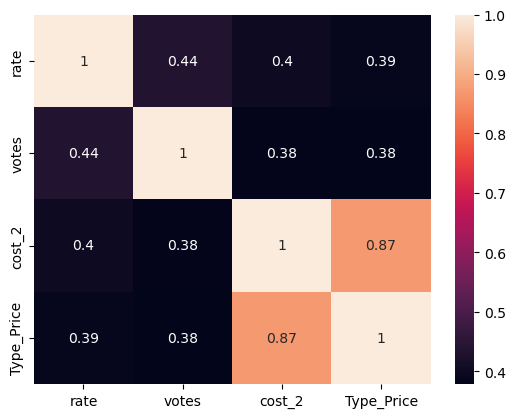

In [93]:
sns.heatmap(df2.corr(),annot=True)

In [94]:
# type_priice will be a strong predictor for cost_2

In [95]:
# we are dropping the vote column since the rating is calculated by the avg no of votes may not havebeen takein into 
# also we have value for price where votes are 0

In [96]:
df2.drop(columns='votes',inplace=True)

In [97]:
df2.drop(columns='cuisines',inplace=True)

In [98]:
df2

,online_order,book_table,rate,listed_in(type),listed_in(city),cost_2,Type_Price,cuisine_type
0,Yes,Yes,4.1,Buffet,Banashankari,800.0,1,indian
1,Yes,No,4.1,Buffet,Banashankari,800.0,1,international
2,Yes,No,3.8,Buffet,Banashankari,800.0,1,others
3,No,No,3.7,Buffet,Banashankari,300.0,0,indian
4,No,No,3.8,Buffet,Banashankari,600.0,1,indian
...,...,...,...,...,...,...,...,...
51712,No,No,3.6,Pubs and bars,Whitefield,1500.0,2,international
51713,No,No,3.7,Pubs and bars,Whitefield,600.0,1,others
51714,No,No,4.1,Pubs and bars,Whitefield,2000.0,2,others
51715,No,Yes,4.3,Pubs and bars,Whitefield,2500.0,2,others


In [99]:
df2.skew()

rate         -0.250272
cost_2        2.597222
Type_Price    0.884954
dtype: float64

<AxesSubplot:ylabel='Density'>

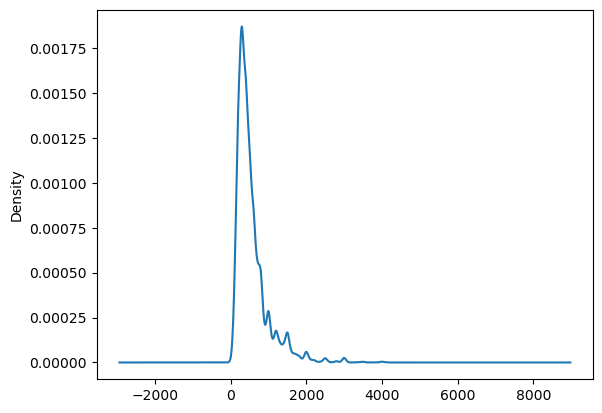

In [100]:
df2['cost_2'].plot(kind ='kde')

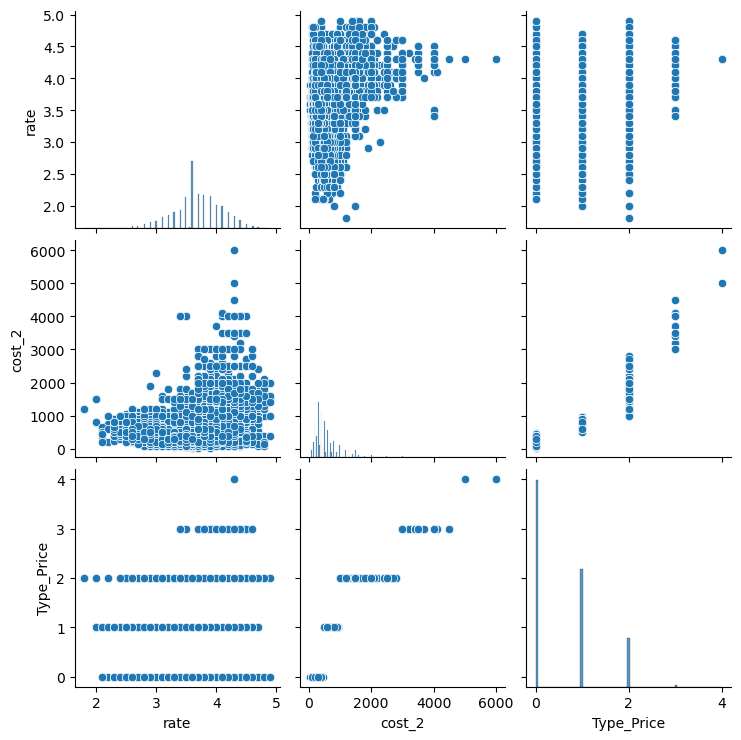

In [101]:
sns.pairplot(df2)

In [102]:
# since there are no strong linear relationships linear regression might not be the best choice

In [103]:
df2
X = df2.drop(columns='cost_2')
y = df2['cost_2']

In [104]:
X

,online_order,book_table,rate,listed_in(type),listed_in(city),Type_Price,cuisine_type
0,Yes,Yes,4.1,Buffet,Banashankari,1,indian
1,Yes,No,4.1,Buffet,Banashankari,1,international
2,Yes,No,3.8,Buffet,Banashankari,1,others
3,No,No,3.7,Buffet,Banashankari,0,indian
4,No,No,3.8,Buffet,Banashankari,1,indian
...,...,...,...,...,...,...,...
51712,No,No,3.6,Pubs and bars,Whitefield,2,international
51713,No,No,3.7,Pubs and bars,Whitefield,1,others
51714,No,No,4.1,Pubs and bars,Whitefield,2,others
51715,No,Yes,4.3,Pubs and bars,Whitefield,2,others


In [105]:
df2['rate'] = pd.to_numeric(df2['rate'])

In [106]:
df2['rate'].isna().sum()

0

<AxesSubplot:>

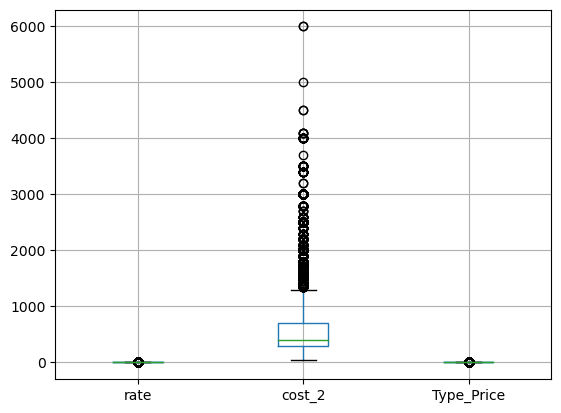

In [107]:
df2.boxplot()

In [108]:
df2['listed_in(type)'].value_counts()

Delivery              25653
Dine-out              17583
Desserts               3559
Cafes                  1703
Drinks & nightlife     1091
Buffet                  871
Pubs and bars           688
Name: listed_in(type), dtype: int64

In [109]:
len(df2['listed_in(city)'].value_counts())

30

In [110]:
X = pd.get_dummies(X,drop_first=True)

In [111]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [111]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=10)

In [112]:
xtrain

,rate,Type_Price,online_order_Yes,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,...,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield,cuisine_type_international,cuisine_type_others
51370,2.7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
44246,3.5,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
37445,3.3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
39410,4.3,2,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
36687,4.7,2,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28272,3.9,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51057,4.1,2,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
29469,4.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40447,3.7,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [113]:
X.isna().sum()

rate                                     0
Type_Price                               0
online_order_Yes                         0
book_table_Yes                           0
listed_in(type)_Cafes                    0
listed_in(type)_Delivery                 0
listed_in(type)_Desserts                 0
listed_in(type)_Dine-out                 0
listed_in(type)_Drinks & nightlife       0
listed_in(type)_Pubs and bars            0
listed_in(city)_Banashankari             0
listed_in(city)_Bannerghatta Road        0
listed_in(city)_Basavanagudi             0
listed_in(city)_Bellandur                0
listed_in(city)_Brigade Road             0
listed_in(city)_Brookefield              0
listed_in(city)_Church Street            0
listed_in(city)_Electronic City          0
listed_in(city)_Frazer Town              0
listed_in(city)_HSR                      0
listed_in(city)_Indiranagar              0
listed_in(city)_JP Nagar                 0
listed_in(city)_Jayanagar                0
listed_in(c

In [114]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [116]:
perf_score = pd.DataFrame(columns=['Model', 'R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

def per_measures(model):

   #-----------------------------------------------#
   # Calculation of R square and Adj R2            #
   #-----------------------------------------------#

   # calculate rsquare value

    rsq_train = model.score(xtrain, ytrain)
    rsq_test  = model.score(xtest, ytest)

    # calculating adjusted rsquare value
    n =xtrain.shape[0]
    k = xtrain.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#

    model.fit(xtrain,ytrain)

    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)




####



def update_performance (name, model ):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'          : name,
                                    
                                    'R2_Train'       : per_measures(model)[0],
                                    'R2_Test'        : per_measures(model)[1],
                                    'RMSE Train'     : per_measures(model)[2],
                                    'RMSE TEST'      : per_measures(model)[3],
                                    'MAPE'           : per_measures(model)[4]
                                    },
                                   ignore_index = True)

In [117]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE


In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
update_performance('lr_base',lr)

In [120]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981


In [121]:
from sklearn.tree import DecisionTreeRegressor

In [122]:
dt  = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [123]:
update_performance('dt_base',dt)

In [124]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981
1,dt_base,0.943997,0.827412,103.692093,184.851223,26.390195


In [125]:
# we are getting better performance for decision tree we will try tuning the  decision tree

dt = DecisionTreeRegressor()
param_grid = {
    'criterion': ['mse'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [ 2, 4],
}

# Create Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)


grid_search.fit(xtrain,ytrain)

dt = DecisionTreeRegressor(**grid_search.best_params_)
dt.fit(xtrain,ytrain)

In [126]:
dt = DecisionTreeRegressor(**{'criterion': 'mse',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10})
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=10, min_samples_leaf=2,
                      min_samples_split=10)

In [369]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [127]:
update_performance('dt_tuned',dt)

In [128]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981
1,dt_base,0.943997,0.827412,103.692093,184.851223,26.390195
2,dt_tuned,0.882071,0.875246,150.470196,156.704631,24.798021


In [129]:
#random forrest

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [133]:
update_performance('rf_base',rf)

In [134]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981
1,dt_base,0.943997,0.827412,103.692093,184.851223,26.390195
2,dt_tuned,0.882071,0.875246,150.470196,156.704631,24.798021
3,rf_base,0.938783,0.862842,108.497790,163.826618,25.692235


In [135]:
#lot of improvement in rf 
from sklearn.model_selection import RandomizedSearchCV


rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, ],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
   
}

random_search = RandomizedSearchCV(
    rf_regressor, 
    param_distributions=param_grid, 
    n_iter=50,  # Number of parameter settings to sample
    scoring='neg_mean_squared_error',  # Use negative mean squared error as a scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=2,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

# Fit RandomizedSearchCV to your data
random_search.fit(xtrain, ytrain)

In [381]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [136]:
rf = RandomForestRegressor(**{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20},random_state=42)
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=20, min_samples_split=10, random_state=42)

In [137]:
update_performance('rf_tuned',rf)

In [138]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981
1,dt_base,0.943997,0.827412,103.692093,184.851223,26.390195
2,dt_tuned,0.882071,0.875246,150.470196,156.704631,24.798021
3,rf_base,0.938783,0.862842,108.497790,163.826618,25.692235
4,rf_tuned,0.916097,0.884005,126.920000,151.105045,24.467971


In [140]:
rf_imp = pd.DataFrame({'features':xtrain.columns ,'imp':rf.feature_importances_})

In [142]:
rf_imp.sort_values(by='imp',ascending=False)

,features,imp
1,Type_Price,0.920250
0,rate,0.023341
3,book_table_Yes,0.006471
2,online_order_Yes,0.004733
40,cuisine_type_others,0.003566
39,cuisine_type_international,0.003427
16,listed_in(city)_Church Street,0.002187
29,listed_in(city)_Lavelle Road,0.002144
30,listed_in(city)_MG Road,0.002130
14,listed_in(city)_Brigade Road,0.001924


In [139]:
from sklearn.feature_selection import SelectFromModel

In [209]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=10)

In [198]:
sm = SelectFromModel(estimator=rf,threshold=0.02)
sm.fit(xtrain,ytrain)

SelectFromModel(estimator=RandomForestRegressor(max_depth=20,
                                                min_samples_split=10,
                                                random_state=42),
                threshold=0.02)

## type_price has 92% feature imp

In [199]:
a =  sm.get_feature_names_out()
a

array(['rate', 'Type_Price'], dtype=object)

In [200]:
xtrain = xtrain[a]
xtest = xtest[a]

In [206]:
rf.fit(xtrain,ytrain)
update_performance('rf_0.02',rf)

In [207]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981
1,dt_base,0.943997,0.827412,103.692093,184.851223,26.390195
2,dt_tuned,0.882071,0.875246,150.470196,156.704631,24.798021
3,rf_base,0.938783,0.862842,108.497790,163.826618,25.692235
4,rf_tuned,0.916097,0.884005,126.920000,151.105045,24.467971
5,rf_0.0035,0.874952,0.876304,154.945400,156.040298,25.055011
6,rf_0.0020,0.886896,0.875530,147.359892,156.527586,24.794290
7,rf_0.0020,0.859588,0.863693,164.188685,163.801703,25.969832
8,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832
9,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832


In [203]:
#based on our model 

In [190]:
## we can do further feature importance 

In [208]:
# we are getting better result when we include all the features reducing features based on feature importance is not giving good results

In [211]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [212]:
gb = GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
update_performance('g_boost_base',gb)

In [214]:
dt = DecisionTreeRegressor()
ada = AdaBoostRegressor(base_estimator=dt)
ada.fit(xtrain,ytrain)
update_performance('ada_boost_base',ada)

In [216]:
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)
update_performance('xgb_boost_base',xgb)

In [217]:
perf_score



,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981
1,dt_base,0.943997,0.827412,103.692093,184.851223,26.390195
2,dt_tuned,0.882071,0.875246,150.470196,156.704631,24.798021
3,rf_base,0.938783,0.862842,108.497790,163.826618,25.692235
4,rf_tuned,0.916097,0.884005,126.920000,151.105045,24.467971
5,rf_0.0035,0.874952,0.876304,154.945400,156.040298,25.055011
6,rf_0.0020,0.886896,0.875530,147.359892,156.527586,24.794290
7,rf_0.0020,0.859588,0.863693,164.188685,163.801703,25.969832
8,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832
9,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832


In [218]:
xgb =XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]}

grd = GridSearchCV(estimator=xgb,param_grid=param_grid,cv=3,scoring ='neg_mean_squared_error',n_jobs=-1,verbose=2)
grd.fit(xtrain,ytrain)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [219]:
xgb =XGBRegressor(**grd.best_params_)
xgb.fit(xtrain,ytrain)
update_performance('xgb_boost_base',xgb)

In [221]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981
1,dt_base,0.943997,0.827412,103.692093,184.851223,26.390195
2,dt_tuned,0.882071,0.875246,150.470196,156.704631,24.798021
3,rf_base,0.938783,0.862842,108.497790,163.826618,25.692235
4,rf_tuned,0.916097,0.884005,126.920000,151.105045,24.467971
5,rf_0.0035,0.874952,0.876304,154.945400,156.040298,25.055011
6,rf_0.0020,0.886896,0.875530,147.359892,156.527586,24.794290
7,rf_0.0020,0.859588,0.863693,164.188685,163.801703,25.969832
8,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832
9,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832


In [224]:
xgb_f = pd.DataFrame(xgb.feature_importances_,xtrain.columns)
xgb_f.sort_values(by = 0,ascending=False)

,0
Type_Price,0.773996
book_table_Yes,0.015859
listed_in(city)_Koramangala 7th Block,0.014494
listed_in(city)_Koramangala 5th Block,0.013185
online_order_Yes,0.009733
listed_in(city)_Lavelle Road,0.009453
listed_in(city)_JP Nagar,0.009050
listed_in(city)_Koramangala 4th Block,0.008841
listed_in(city)_Residency Road,0.008286
listed_in(type)_Delivery,0.007660


In [232]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=10)

In [226]:
sm = SelectFromModel(estimator=xgb,threshold=0.0025)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtrain = xtrain[a]
xtest = xtest[a]
xgb.fit(xtrain,ytrain)
update_performance('xgb_0.0025',xgb)

In [227]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981
1,dt_base,0.943997,0.827412,103.692093,184.851223,26.390195
2,dt_tuned,0.882071,0.875246,150.470196,156.704631,24.798021
3,rf_base,0.938783,0.862842,108.497790,163.826618,25.692235
4,rf_tuned,0.916097,0.884005,126.920000,151.105045,24.467971
5,rf_0.0035,0.874952,0.876304,154.945400,156.040298,25.055011
6,rf_0.0020,0.886896,0.875530,147.359892,156.527586,24.794290
7,rf_0.0020,0.859588,0.863693,164.188685,163.801703,25.969832
8,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832
9,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832


In [230]:
sm = SelectFromModel(estimator=xgb,threshold=0.005)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtrain = xtrain[a]
xtest = xtest[a]
xgb.fit(xtrain,ytrain)

update_performance('xgb_0.005',xgb)
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981
1,dt_base,0.943997,0.827412,103.692093,184.851223,26.390195
2,dt_tuned,0.882071,0.875246,150.470196,156.704631,24.798021
3,rf_base,0.938783,0.862842,108.497790,163.826618,25.692235
4,rf_tuned,0.916097,0.884005,126.920000,151.105045,24.467971
5,rf_0.0035,0.874952,0.876304,154.945400,156.040298,25.055011
6,rf_0.0020,0.886896,0.875530,147.359892,156.527586,24.794290
7,rf_0.0020,0.859588,0.863693,164.188685,163.801703,25.969832
8,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832
9,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832


In [233]:
sm = SelectFromModel(estimator=xgb,threshold=0.025)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtrain = xtrain[a]
xtest = xtest[a]
xgb.fit(xtrain,ytrain)
update_performance('xgb_0.025',xgb)

In [235]:
perf_score

,Model,R2_Train,R2_Test,RMSE Train,RMSE TEST,MAPE
0,lr_base,0.788343,0.787355,201.584208,204.590854,28.539981
1,dt_base,0.943997,0.827412,103.692093,184.851223,26.390195
2,dt_tuned,0.882071,0.875246,150.470196,156.704631,24.798021
3,rf_base,0.938783,0.862842,108.497790,163.826618,25.692235
4,rf_tuned,0.916097,0.884005,126.920000,151.105045,24.467971
5,rf_0.0035,0.874952,0.876304,154.945400,156.040298,25.055011
6,rf_0.0020,0.886896,0.875530,147.359892,156.527586,24.794290
7,rf_0.0020,0.859588,0.863693,164.188685,163.801703,25.969832
8,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832
9,rf_0.0050,0.859588,0.863693,164.188685,163.801703,25.969832


so the best model is Random Forrest with tuned parameters thats giving an error of  151


Section B: Title: Classification
Problem Statement:
The model that you built in the above case study has gone to deployment and Zomato has
been impressed with your data analysis and Zomoto has been believing that your analysis
going to be impactful. Now Zomato has been observing the orders happening online and
offline, Due to offline orders, Zomato is not able to attract customers with diverse items and
offers, and the user subscription also getting low. so it has decided to give you the project
on the same. Now the problem statement is that Zomato wants to know whether the
customer would order the orders online or offline so that Zomato can take further
strategies to improve the online order.
Objective:
The Aim is to classify the orders that have been ordered online and offline. And
identify the patterns that lead to orders online orders as well as offline. Your model should
be able to classify the classes effectively.

In [220]:
df2

,online_order,book_table,rate,listed_in(type),listed_in(city),cost_2,Type_Price,cuisine_type
0,Yes,Yes,4.1,Buffet,Banashankari,800.0,1,indian
1,Yes,No,4.1,Buffet,Banashankari,800.0,1,international
2,Yes,No,3.8,Buffet,Banashankari,800.0,1,others
3,No,No,3.7,Buffet,Banashankari,300.0,0,indian
4,No,No,3.8,Buffet,Banashankari,600.0,1,indian
...,...,...,...,...,...,...,...,...
51712,No,No,3.6,Pubs and bars,Whitefield,1500.0,2,international
51713,No,No,3.7,Pubs and bars,Whitefield,600.0,1,others
51714,No,No,4.1,Pubs and bars,Whitefield,2000.0,2,others
51715,No,Yes,4.3,Pubs and bars,Whitefield,2500.0,2,others


In [ ]:
# here our goal is predict whether order will online or offline based on the data 

# checking the balance of the data 

In [112]:
df3 = df2.copy()

In [113]:
df3['online_order'].value_counts(normalize=True)



Yes    0.592614
No     0.407386
Name: online_order, dtype: float64

In [114]:
#since our goal is perdict whether an order will be online or offline 
# here since both classes are important since we want to predict whether the order will be online or offline
# since if its a offline order company can give more offers to make them order online
# so we give importance for that

<AxesSubplot:xlabel='online_order', ylabel='count'>

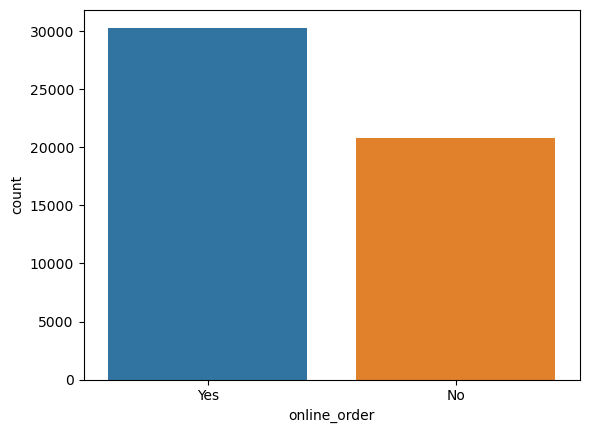

In [115]:
sns.countplot(df3['online_order'])

In [116]:
df3

,online_order,book_table,rate,listed_in(type),listed_in(city),cost_2,Type_Price,cuisine_type
0,Yes,Yes,4.1,Buffet,Banashankari,800.0,1,indian
1,Yes,No,4.1,Buffet,Banashankari,800.0,1,international
2,Yes,No,3.8,Buffet,Banashankari,800.0,1,others
3,No,No,3.7,Buffet,Banashankari,300.0,0,indian
4,No,No,3.8,Buffet,Banashankari,600.0,1,indian
...,...,...,...,...,...,...,...,...
51712,No,No,3.6,Pubs and bars,Whitefield,1500.0,2,international
51713,No,No,3.7,Pubs and bars,Whitefield,600.0,1,others
51714,No,No,4.1,Pubs and bars,Whitefield,2000.0,2,others
51715,No,Yes,4.3,Pubs and bars,Whitefield,2500.0,2,others


In [117]:
df3.corr()

,rate,cost_2,Type_Price
rate,1.000000,0.398387,0.386810
cost_2,0.398387,1.000000,0.869149
Type_Price,0.386810,0.869149,1.000000


In [118]:
df3['Type_Price']

0        1
1        1
2        1
3        0
4        1
        ..
51712    2
51713    1
51714    2
51715    2
51716    2
Name: Type_Price, Length: 51148, dtype: int64

<AxesSubplot:xlabel='online_order', ylabel='rate'>

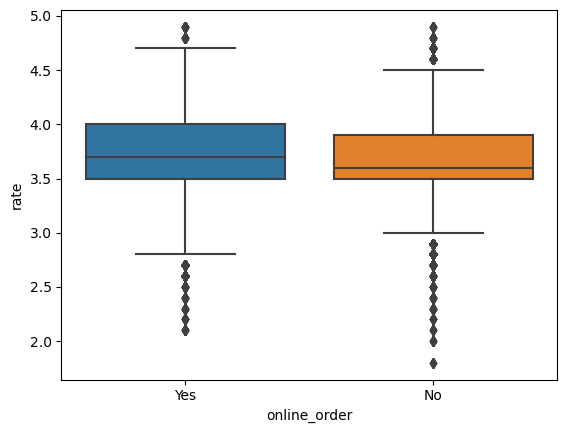

In [119]:
sns.boxplot(df3['online_order'],df3.rate)

In [120]:
## statstically testing whether rate has any impact on the order
#
from scipy.stats import chi2,chi2_contingency,ttest_ind,mannwhitneyu,shapiro,levene


In [121]:
yes_r = df3[df3['online_order'] == 'Yes']['rate']
No_r = df3[df3['online_order'] == 'No']['rate']

In [122]:
shapiro(yes_r)

ShapiroResult(statistic=0.9839465618133545, pvalue=0.0)

In [123]:
shapiro(No_r)

ShapiroResult(statistic=0.9711219072341919, pvalue=0.0)

In [124]:
# non parmateric test
print('null hypo: both medians are same')
print('alter hypo: both medians are different')
st,p = mannwhitneyu(yes_r,No_r)
if p < 0.05:
    print('both medians are different reject null hypo')
else:
    print('retain null hypothesis')

null hypo: both medians are same
alter hypo: both medians are different
both medians are different reject null hypo


<AxesSubplot:xlabel='online_order', ylabel='cost_2'>

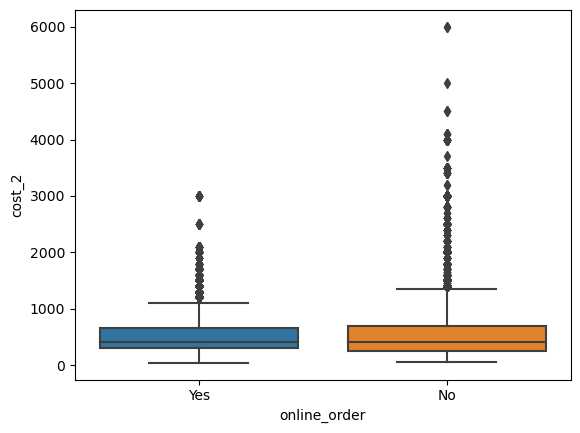

In [125]:
sns.boxplot(df3['online_order'],df3.cost_2)

In [126]:
#checking cost of order has any effect on onlie order
yes_c = df3[df3['online_order'] == 'Yes']['cost_2']
No_c = df3[df3['online_order'] == 'No']['cost_2']


In [127]:
shapiro(yes_c)

ShapiroResult(statistic=0.8350489139556885, pvalue=0.0)

In [128]:
# non parmateric test
print('null hypo: both medians are same')
print('alter hypo: both medians are different')
st,p = mannwhitneyu(yes_c,No_c)
if p < 0.05:
    print('both medians are different reject null hypo')
else:
    print('retain null hypothesis')

null hypo: both medians are same
alter hypo: both medians are different
both medians are different reject null hypo


In [129]:
# so we can use the features

<AxesSubplot:>

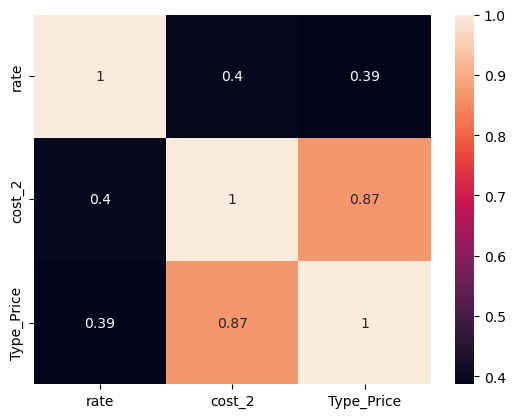

In [130]:
sns.heatmap(df3.corr(),annot=True)

In [131]:
# the cost_2 and type_price have very high multicollinearity since we created the column in way to divide 
# the type of restaurnts based on the affordability 
# we can use one of the columns 
# since type_price is an ordinal categorical column we check for both correlation and chi test between target

In [132]:
df2

,online_order,book_table,rate,listed_in(type),listed_in(city),cost_2,Type_Price,cuisine_type
0,Yes,Yes,4.1,Buffet,Banashankari,800.0,1,indian
1,Yes,No,4.1,Buffet,Banashankari,800.0,1,international
2,Yes,No,3.8,Buffet,Banashankari,800.0,1,others
3,No,No,3.7,Buffet,Banashankari,300.0,0,indian
4,No,No,3.8,Buffet,Banashankari,600.0,1,indian
...,...,...,...,...,...,...,...,...
51712,No,No,3.6,Pubs and bars,Whitefield,1500.0,2,international
51713,No,No,3.7,Pubs and bars,Whitefield,600.0,1,others
51714,No,No,4.1,Pubs and bars,Whitefield,2000.0,2,others
51715,No,Yes,4.3,Pubs and bars,Whitefield,2500.0,2,others


<AxesSubplot:xlabel='online_order'>

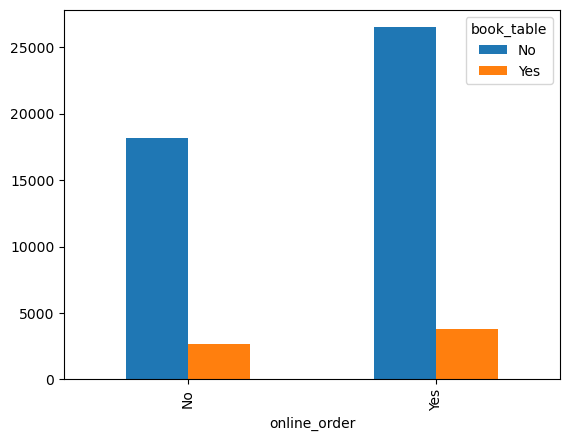

In [133]:
pd.crosstab(df3['online_order'],df3['book_table']).plot(kind ='bar')

In [134]:
pd.crosstab(df3['online_order'],df3['book_table'],margins=True)
#here we can see that for online order the customers
#customer would have ordered the menu online and also have booked a table there
# they have dined there 
# so based on thesse patterns we need to findout whether the order is online or not

book_table,No,Yes,All
online_order,,,
No,18193,2644,20837
Yes,26506,3805,30311
All,44699,6449,51148


In [135]:
from statsmodels.stats.proportion import proportions_ztest


In [136]:
proportions_ztest([2644,3805],[20837,30311])

(0.45450130052069204, 0.6494680560947448)

In [137]:
chi2_contingency(pd.crosstab(df3['online_order'],df3['book_table']))

(0.19443362213581583,
 0.659251887852286,
 1,
 array([[18209.76505435,  2627.23494565],
        [26489.23494565,  3821.76505435]]))

In [138]:
#statisticall they are independent

In [139]:
df3.head(3)

,online_order,book_table,rate,listed_in(type),listed_in(city),cost_2,Type_Price,cuisine_type
0,Yes,Yes,4.1,Buffet,Banashankari,800.0,1,indian
1,Yes,No,4.1,Buffet,Banashankari,800.0,1,international
2,Yes,No,3.8,Buffet,Banashankari,800.0,1,others


In [140]:
pd.crosstab(df3['online_order'],df3['listed_in(city)'])


listed_in(city),BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
online_order,,,,,,,,,,,,,,,,,,,,,
No,1133,317,599,470,396,849,538,930,657,467,...,987,922,431,685,328,580,529,897,467,742
Yes,2119,543,1002,794,814,916,958,888,559,712,...,742,863,662,946,407,802,540,704,770,850


In [141]:
chi2_contingency(pd.crosstab(df3['online_order'],df3['listed_in(city)']))

(1061.1032814519565,
 1.0372366976464028e-204,
 29,
 array([[1324.82059905,  350.35231094,  652.22563932,  514.9364198 ,
          492.93755377,  719.03701024,  609.45006647,  740.62848987,
          495.38187221,  480.30857512,  703.96371315,  748.77621803,
          844.51202393,  960.20976382,  525.12108   ,  532.86142176,
         1117.86830375, 1141.90410182, 1054.7234105 , 1183.05012904,
          704.37109955,  727.18473841,  445.27334402,  664.44723156,
          299.42900993,  563.00801595,  435.49607023,  652.22563932,
          503.93698678,  648.55916165],
        [1927.17940095,  509.64768906,  948.77436068,  749.0635802 ,
          717.06244623, 1045.96298976,  886.54993353, 1077.37151013,
          720.61812779,  698.69142488, 1024.03628685, 1089.22378197,
         1228.48797607, 1396.79023618,  763.87892   ,  775.13857824,
         1626.13169625, 1661.09589818, 1534.2765895 , 1720.94987096,
         1024.62890045, 1057.81526159,  647.72665598,  966.55276844,
          4

In [142]:
# p < 0.05 they are depenednet

<AxesSubplot:xlabel='online_order'>

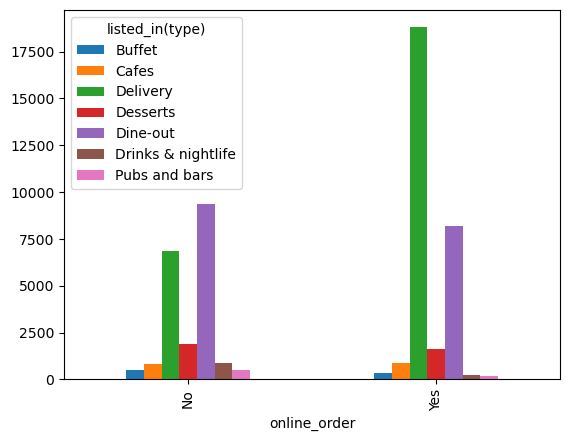

In [143]:
pd.crosstab(df3['online_order'],df3['listed_in(type)']).plot(kind='bar')


In [144]:
# as expected delivery is more for online orders while dine-out is more prevelanet in offline orders

In [145]:
chi2_contingency(pd.crosstab(df3['online_order'],df3['listed_in(type)']))

(4557.169495315264,
 0.0,
 6,
 array([[  354.83356143,   693.77905294, 10450.68352624,  1449.88822632,
          7163.07521311,   444.45857121,   280.28184875],
        [  516.16643857,  1009.22094706, 15202.31647376,  2109.11177368,
         10419.92478689,   646.54142879,   407.71815125]]))

In [146]:
#the variable is signiificant

In [147]:
chi2_contingency(pd.crosstab(df3['online_order'],df3['Type_Price']))

(1650.9260742786184,
 0.0,
 4,
 array([[1.14756677e+04, 6.54507003e+03, 2.71808211e+03, 9.69579651e+01,
         1.22215922e+00],
        [1.66933323e+04, 9.52092997e+03, 3.95391789e+03, 1.41042035e+02,
         1.77784078e+00]]))

In [148]:
#the variable is signiificant

<AxesSubplot:xlabel='online_order'>

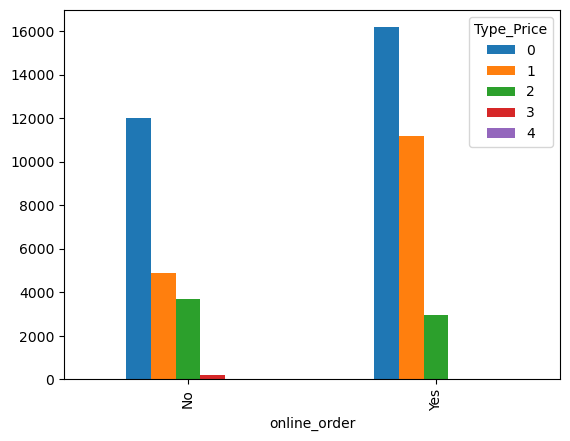

In [149]:
pd.crosstab(df3['online_order'],df3['Type_Price']).plot(kind='bar')


In [150]:
#most belong to first_3 catgeory the expensive type is less prevelant as the count is less
# for most online orders the max orders for mid range price 


<AxesSubplot:xlabel='online_order'>

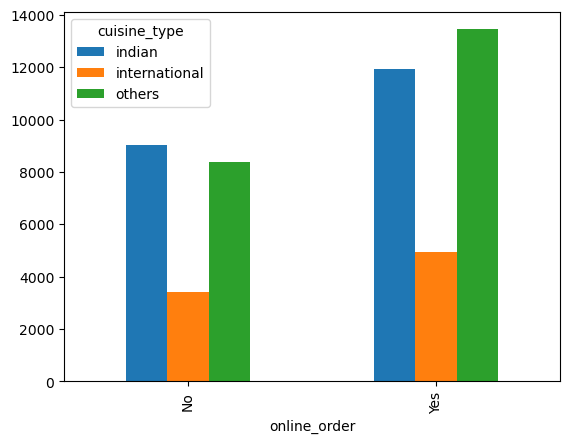

In [151]:
pd.crosstab(df3['online_order'],df3['cuisine_type']).plot(kind='bar')


In [152]:
# the cusine others is more common for online orders while indian bit more in count in offline orders

print((chi2_contingency(pd.crosstab(df3['online_order'],df3['cuisine_type']))[1]),'p_val')
print('variable is significant as p_value < 0.05')

1.0890822902308834e-21 p_val
variable is significant as p_value < 0.05


In [153]:
df2

,online_order,book_table,rate,listed_in(type),listed_in(city),cost_2,Type_Price,cuisine_type
0,Yes,Yes,4.1,Buffet,Banashankari,800.0,1,indian
1,Yes,No,4.1,Buffet,Banashankari,800.0,1,international
2,Yes,No,3.8,Buffet,Banashankari,800.0,1,others
3,No,No,3.7,Buffet,Banashankari,300.0,0,indian
4,No,No,3.8,Buffet,Banashankari,600.0,1,indian
...,...,...,...,...,...,...,...,...
51712,No,No,3.6,Pubs and bars,Whitefield,1500.0,2,international
51713,No,No,3.7,Pubs and bars,Whitefield,600.0,1,others
51714,No,No,4.1,Pubs and bars,Whitefield,2000.0,2,others
51715,No,Yes,4.3,Pubs and bars,Whitefield,2500.0,2,others


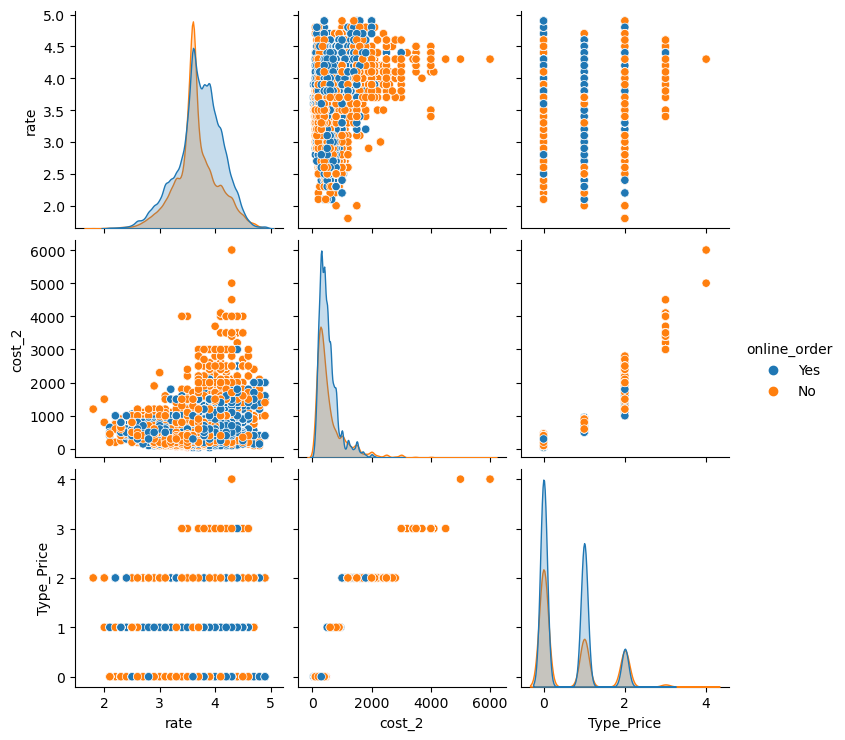

In [154]:
sns.pairplot(df3,hue='online_order')

In [155]:
# there is significant overlap so we will go by non parametric methods

In [156]:
# we will start with all fe

In [157]:
df3

,online_order,book_table,rate,listed_in(type),listed_in(city),cost_2,Type_Price,cuisine_type
0,Yes,Yes,4.1,Buffet,Banashankari,800.0,1,indian
1,Yes,No,4.1,Buffet,Banashankari,800.0,1,international
2,Yes,No,3.8,Buffet,Banashankari,800.0,1,others
3,No,No,3.7,Buffet,Banashankari,300.0,0,indian
4,No,No,3.8,Buffet,Banashankari,600.0,1,indian
...,...,...,...,...,...,...,...,...
51712,No,No,3.6,Pubs and bars,Whitefield,1500.0,2,international
51713,No,No,3.7,Pubs and bars,Whitefield,600.0,1,others
51714,No,No,4.1,Pubs and bars,Whitefield,2000.0,2,others
51715,No,Yes,4.3,Pubs and bars,Whitefield,2500.0,2,others


In [158]:
X = df3.drop(columns=['online_order'])
y = df3['online_order']

In [159]:
y = y.map({'Yes':1,'No':0})
X  = pd.get_dummies(X,drop_first=True)

In [160]:
X

,rate,cost_2,Type_Price,book_table_Yes,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars,...,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield,cuisine_type_international,cuisine_type_others
0,4.1,800.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.1,800.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.8,800.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3.7,300.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,600.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,3.6,1500.0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
51713,3.7,600.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
51714,4.1,2000.0,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
51715,4.3,2500.0,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [161]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [162]:
perf_score = pd.DataFrame(columns=["Model", "Accuracy_TR","Recall_TR","Precision_TR","F1 Score_TR", "Accuracy_Ts","Recall_Ts","Precision_Ts","F1 Score_Ts"] )

def per_measures(model,test,pred,test1,pred1):


    accuracy    =accuracy_score(test,pred)
    f1score     =f1_score(test,pred)
    recall      =recall_score(test,pred)
    precision   =precision_score(test,pred)
    
    accuracy1    =accuracy_score(test1,pred1)
    f1score1     =f1_score(test1,pred1)
    recall1     =recall_score(test1,pred1)
    precision1   =precision_score(test1,pred1)
      # aic         =model.aic
      # reliability = cohen_kappa_score(test,pred)



    return (accuracy,recall,precision,f1score,accuracy1,recall1,precision1,f1score1)

def update_performance (name,
                        model,
                        test,
                        pred,test1,pred1
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy_TR'    : per_measures(model,test,pred,test1,pred1)[0],
                                    'Recall_TR'      : per_measures(model,test,pred,test1,pred1)[1],
                                    'Precision_TR'   : per_measures(model,test,pred,test1,pred1)[2],
                                    'F1 Score_TR'    : per_measures(model,test,pred,test1,pred1)[3],
                                    'Accuracy_Ts'    : per_measures(model,test,pred,test1,pred1)[4],
                                    'Recall_Ts'      : per_measures(model,test,pred,test1,pred1)[5],
                                    'Precision_Ts'   : per_measures(model,test,pred,test1,pred1)[6],
                                    'F1 Score_Ts'    : per_measures(model,test,pred,test1,pred1)[7]



                                     },
                                   ignore_index = True)

In [163]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts


In [164]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=10,test_size=0.20)

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [167]:
update_performance('lg_base',lg,ytrain,lg.predict(xtrain),ytest,lg.predict(xtest))

In [168]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131


In [169]:
# we are focussing on f1 score

In [170]:
#vif checking for multicoliniarity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
vif = [ variance_inflation_factor(xtrain.values,i)                         for i in range(xtrain.shape[1])]
VIF = pd.DataFrame(vif,xtrain.columns)

In [172]:
VIF.sort_values(by =0,ascending=False)

,0
rate,52.244469
listed_in(type)_Delivery,21.636715
listed_in(type)_Dine-out,14.781134
cost_2,12.184002
Type_Price,6.968770
listed_in(type)_Desserts,4.224838
listed_in(type)_Cafes,2.480922
cuisine_type_others,2.383893
book_table_Yes,1.982787
listed_in(type)_Drinks & nightlife,1.859797


In [173]:
xtr = xtrain.drop(columns = 'rate')
vif = [ variance_inflation_factor(xtr.values,i)                         for i in range(xtr.shape[1])]
VIF = pd.DataFrame(vif,xtr.columns)

In [174]:
VIF

,0
cost_2,11.695475
Type_Price,6.966875
book_table_Yes,1.909831
listed_in(type)_Cafes,1.565907
listed_in(type)_Delivery,7.665597
listed_in(type)_Desserts,2.189558
listed_in(type)_Dine-out,5.617358
listed_in(type)_Drinks & nightlife,1.439062
listed_in(type)_Pubs and bars,1.256850
listed_in(city)_Banashankari,1.213276


In [175]:
xtr = xtrain.drop(columns = ['rate','cost_2'])
vif = [ variance_inflation_factor(xtr.values,i)                         for i in range(xtr.shape[1])]
VIF = pd.DataFrame(vif,xtr.columns)

In [176]:
VIF

,0
Type_Price,2.860334
book_table_Yes,1.772789
listed_in(type)_Cafes,1.555515
listed_in(type)_Delivery,7.400561
listed_in(type)_Desserts,2.150389
listed_in(type)_Dine-out,5.378148
listed_in(type)_Drinks & nightlife,1.393341
listed_in(type)_Pubs and bars,1.240199
listed_in(city)_Banashankari,1.211435
listed_in(city)_Bannerghatta Road,1.401193


In [177]:
# now we will build a log model without mc

xtr 
xt = xtest.drop(columns =['rate','cost_2'] )

In [178]:
lg = LogisticRegression()
lg.fit(xtr,ytrain)
update_performance('lg_base_mc',lg,ytrain,lg.predict(xtr),ytest,lg.predict(xt))

In [179]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979


In [180]:
# not much improvment we will try diff models

# Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

In [182]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
update_performance('dt_base',dt,ytrain,dt.predict(xtrain),ytest,dt.predict(xtest))

In [183]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100


In [184]:
# will do a grid seacrh cv to get optimum features
from sklearn.metrics import make_scorer, f1_score

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
f1_scorer = make_scorer(f1_score, average='weighted')

dt = DecisionTreeClassifier()
grd = GridSearchCV(estimator=dt,param_grid=param_grid,cv=3,scoring=f1_scorer)


In [185]:
grd.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(f1_score, average=weighted))

In [186]:
grd.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [187]:
dt = DecisionTreeClassifier(**grd.best_params_,random_state=10)
dt.fit(xtrain,ytrain)
update_performance('dt_base_tuned',dt,ytrain,dt.predict(xtrain),ytest,dt.predict(xtest))

In [188]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045


In [189]:
# till now we are getting better results till now 

# random forest`

In [190]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
update_performance('rf_base',rf,ytrain,rf.predict(xtrain),ytest,rf.predict(xtest))

In [194]:
from sklearn.model_selection import RandomizedSearchCV

In [195]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094


In [196]:
rf = RandomForestClassifier()
param_dist = {
    'n_estimators': [50,100,150,200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None,10,20,30,40,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=3, verbose=2, scoring=f1_scorer, random_state=42)

# Fit the random search to your data
random_search.fit(xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.7s
[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; to

[CV] END max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   5.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   8.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   7.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   7.8s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   8.0s
[CV] END max_depth=40, max_featur

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.3s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.3s
[CV] END max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   3.2s
[CV] END max_depth=30, max_features=auto

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42,
                   scoring=make_scorer(f1_score, average=weighted), verbose=2)

In [197]:
rf = RandomForestClassifier(**random_search.best_params_)
rf.fit(xtrain,ytrain)
update_performance('rf_base_tuned',rf,ytrain,rf.predict(xtrain),ytest,rf.predict(xtest))

In [198]:
random_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50}

In [199]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087


In [200]:
rf_imp = pd.DataFrame(rf.feature_importances_,xtrain.columns).sort_values(by=0,ascending=False)

In [201]:
rf_imp

,0
rate,0.262201
cost_2,0.197677
listed_in(type)_Delivery,0.156702
listed_in(type)_Dine-out,0.054299
Type_Price,0.054215
cuisine_type_others,0.022288
book_table_Yes,0.018540
cuisine_type_international,0.018379
listed_in(type)_Drinks & nightlife,0.016935
listed_in(type)_Desserts,0.013247


In [202]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=10,test_size=0.20)

In [205]:
from sklearn.feature_selection import SelectFromModel
sm = SelectFromModel

In [207]:

sm = SelectFromModel(estimator=rf,threshold=0.005)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
rf.fit(xtr,ytrain)
update_performance('rf_base_0.005',rf,ytrain,rf.predict(xtr),ytest,rf.predict(xt))

In [208]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.005,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852


In [209]:
sm = SelectFromModel(estimator=rf,threshold=0.0075)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
rf.fit(xtr,ytrain)
update_performance('rf_base_0.005',rf,ytrain,rf.predict(xtr),ytest,rf.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.005,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404


In [210]:
perf_score.iloc[7,0] = 'rf_base_0.0075'

In [211]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404


In [212]:
sm = SelectFromModel(estimator=rf,threshold=0.01)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
rf.fit(xtr,ytrain)
update_performance('rf_base_0.01',rf,ytrain,rf.predict(xtr),ytest,rf.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [213]:
sm = SelectFromModel(estimator=rf,threshold=0.0175)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
rf.fit(xtr,ytrain)
update_performance('rf_base_0.0175',rf,ytrain,rf.predict(xtr),ytest,rf.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [214]:
sm = SelectFromModel(estimator=rf,threshold=0.02)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
rf.fit(xtr,ytrain)
update_performance('rf_base_0.02',rf,ytrain,rf.predict(xtr),ytest,rf.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [215]:
sm = SelectFromModel(estimator=rf,threshold=0.01)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
a

array(['rate', 'cost_2', 'Type_Price', 'book_table_Yes',
       'listed_in(type)_Delivery', 'listed_in(type)_Desserts',
       'listed_in(type)_Dine-out', 'listed_in(type)_Drinks & nightlife',
       'listed_in(city)_Lavelle Road', 'cuisine_type_international',
       'cuisine_type_others'], dtype=object)

In [216]:
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
update_performance('gb_base_',gb,ytrain,gb.predict(xtrain),ytest,gb.predict(xtest))


In [217]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [220]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [ 4, 5, 6, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [ 2, 4]
}

# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(gb_classifier, param_distributions=param_grid, n_iter=25, cv=5, verbose=2, n_jobs=-1,scoring=f1_scorer)

In [221]:
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [4, 5, 6, 7],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   scoring=make_scorer(f1_score, average=weighted), verbose=2)

In [222]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 6,
 'learning_rate': 0.3}

In [223]:
gb_classifier = GradientBoostingClassifier(**random_search.best_params_)
gb_classifier.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.3, max_depth=6, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

In [224]:
update_performance('gb_tuned',gb_classifier,ytrain,gb_classifier.predict(xtrain),ytest,gb_classifier.predict(xtest))

In [225]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [233]:
a = list(gb_classifier.feature_importances_)

In [235]:
a.sort()

In [236]:
a

[0.0006806742403243242,
 0.0012766571624472877,
 0.0016981722297165994,
 0.0018971135276520854,
 0.001969799142625881,
 0.001991882993757455,
 0.0022873371342695746,
 0.0022929358519842738,
 0.0023815701327686042,
 0.0024479594795041655,
 0.0024917414728528368,
 0.0025495579277392813,
 0.002766910470351524,
 0.002818389898930778,
 0.003013112427915415,
 0.003159542885656424,
 0.0034134141610564364,
 0.003466738768905017,
 0.003584856959467063,
 0.003636083624807524,
 0.0036515872453957462,
 0.0036563087341228012,
 0.003776050427498514,
 0.003821764672568266,
 0.00415998870038577,
 0.004236606146781523,
 0.0051057881120839445,
 0.005111795203094775,
 0.00542138379915799,
 0.006246049188943964,
 0.006739935229566702,
 0.0071296371545086406,
 0.00860051209125555,
 0.013275982998846416,
 0.025403885157960136,
 0.02868439834467572,
 0.02917454774099029,
 0.04968576615403165,
 0.21409447727070272,
 0.2509975498723848,
 0.27120153526231167]

In [237]:
sm = SelectFromModel(estimator=gb_classifier,threshold=0.001)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
gb_classifier.fit(xtr,ytrain)
update_performance('gb_tuned_0.001',gb_classifier,ytrain,gb_classifier.predict(xtr),ytest,gb_classifier.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [238]:
sm = SelectFromModel(estimator=gb_classifier,threshold=0.0025)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
gb_classifier.fit(xtr,ytrain)
update_performance('gb_tuned_0.0025',gb_classifier,ytrain,gb_classifier.predict(xtr),ytest,gb_classifier.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [239]:
sm = SelectFromModel(estimator=gb_classifier,threshold=0.0035)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
gb_classifier.fit(xtr,ytrain)
update_performance('gb_tuned_0.0035',gb_classifier,ytrain,gb_classifier.predict(xtr),ytest,gb_classifier.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [240]:
sm = SelectFromModel(estimator=gb_classifier,threshold=0.0045)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
gb_classifier.fit(xtr,ytrain)
update_performance('gb_tuned_0.0045',gb_classifier,ytrain,gb_classifier.predict(xtr),ytest,gb_classifier.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [241]:
sm = SelectFromModel(estimator=gb_classifier,threshold=0.01)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
gb_classifier.fit(xtr,ytrain)
update_performance('gb_tuned_0.01',gb_classifier,ytrain,gb_classifier.predict(xtr),ytest,gb_classifier.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [242]:
ada = AdaBoostClassifier()
ada.fit(xtrain,ytrain)
update_performance('adaboost_base',ada,ytrain,ada.predict(xtrain),ytest,ada.predict(xtest))

In [243]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [245]:
xbg = XGBClassifier()
xbg.fit(xtrain,ytrain)
update_performance('xgboost_base',xbg,ytrain,xbg.predict(xtrain),ytest,xbg.predict(xtest))

In [246]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [247]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [ 0.7, 0.8,  1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}
xgb = XGBClassifier()
rand = RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,cv = 2 ,scoring=f1_scorer,n_iter=35)
rand.fit(xtrain,ytrain)

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                     

In [248]:
rand.best_params_

{'subsample': 0.8,
 'reg_lambda': 0.1,
 'reg_alpha': 0,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.1}

In [249]:
xgb = XGBClassifier(**rand.best_params_)
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [250]:
update_performance('Xgb_tuned',xgb,ytrain,xgb.predict(xtrain),ytest,xgb.predict(xtest))

In [251]:
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [252]:
xgb.feature_importances_

array([0.026797  , 0.0263404 , 0.        , 0.02461154, 0.01628059,
       0.24926125, 0.01217081, 0.01388443, 0.03118176, 0.01681693,
       0.02516467, 0.01490097, 0.02129573, 0.02438065, 0.01833683,
       0.0205202 , 0.01837045, 0.02679051, 0.01433713, 0.01768943,
       0.01419915, 0.01588903, 0.02349781, 0.01443343, 0.01537688,
       0.01312669, 0.01352557, 0.01432786, 0.0138177 , 0.03008358,
       0.02411672, 0.0148666 , 0.02183657, 0.01615308, 0.01716299,
       0.0193375 , 0.02508513, 0.01818815, 0.02144444, 0.01788787,
       0.01651194], dtype=float32)

In [253]:
sm = SelectFromModel(estimator=xgb,threshold=0.001)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
xgb.fit(xtr,ytrain)
update_performance('xgb_tuned_0.001',xgb,ytrain,xgb.predict(xtr),ytest,xgb.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [254]:
sm = SelectFromModel(estimator=xgb,threshold=0.01)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
xgb.fit(xtr,ytrain)
update_performance('xgb_tuned_0.01',xgb,ytrain,xgb.predict(xtr),ytest,xgb.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [255]:
sm = SelectFromModel(estimator=xgb,threshold=0.025)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
xgb.fit(xtr,ytrain)
update_performance('xgb_tuned_0.01',xgb,ytrain,xgb.predict(xtr),ytest,xgb.predict(xt))
perf_score

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
0,lg_base,0.662178,0.788611,0.687918,0.734831,0.660997,0.794821,0.682051,0.734131
1,lg_base_mc,0.651547,0.763660,0.685276,0.722348,0.652786,0.765604,0.683057,0.721979
2,dt_base,0.870424,0.860337,0.916246,0.887412,0.667253,0.692065,0.729101,0.710100
3,dt_base_tuned,0.728481,0.838844,0.738982,0.785753,0.691496,0.807437,0.709038,0.755045
4,rf_base,0.870399,0.904476,0.880441,0.892296,0.676051,0.751660,0.713520,0.732094
5,rf_base_tuned,0.760448,0.854284,0.768132,0.808920,0.710557,0.818559,0.725254,0.769087
6,rf_base_0.005,0.755829,0.850373,0.764643,0.805232,0.710655,0.818061,0.725559,0.769039
7,rf_base_0.0075,0.756342,0.852473,0.764239,0.805948,0.708895,0.817563,0.723839,0.767852
8,rf_base_0.005,0.748301,0.846832,0.757644,0.799759,0.716716,0.825697,0.729112,0.774404
9,rf_base_0.01,0.750868,0.852020,0.758180,0.802365,0.722972,0.835491,0.731966,0.780310


In [259]:
perf_score.sort_values(by ='F1 Score_Ts',ascending=False)

,Model,Accuracy_TR,Recall_TR,Precision_TR,F1 Score_TR,Accuracy_Ts,Recall_Ts,Precision_Ts,F1 Score_Ts
17,gb_tuned_0.0045,0.769612,0.853378,0.779407,0.814717,0.736657,0.830179,0.749550,0.787807
16,gb_tuned_0.0035,0.782785,0.861490,0.791129,0.824812,0.735582,0.823207,0.751477,0.785709
14,gb_tuned_0.001,0.796031,0.872771,0.801308,0.835514,0.733333,0.824203,0.748417,0.784484
15,gb_tuned_0.0025,0.791461,0.870630,0.796842,0.832104,0.732942,0.822875,0.748565,0.783963
20,xgboost_base,0.764945,0.859143,0.771016,0.812697,0.729423,0.829847,0.741471,0.783174
18,gb_tuned_0.01,0.756171,0.844608,0.767817,0.804384,0.729814,0.826693,0.743284,0.782773
13,gb_tuned,0.796251,0.873760,0.801034,0.835818,0.731085,0.821049,0.747243,0.782409
23,xgb_tuned_0.01,0.761841,0.860049,0.766982,0.810854,0.726882,0.832835,0.737360,0.782195
22,xgb_tuned_0.001,0.761841,0.860049,0.766982,0.810854,0.726882,0.832835,0.737360,0.782195
21,Xgb_tuned,0.761841,0.860049,0.766982,0.810854,0.726882,0.832835,0.737360,0.782195


In [282]:
metrics.f1_score(ytest,gb_classifier.predict(xt))

0.7852973655150655

In [273]:
sm = SelectFromModel(estimator=gb_classifier,threshold=0.0045)
sm.fit(xtrain,ytrain)
a = sm.get_feature_names_out()
xtr =xtrain[a]
xt =xtest[a]
gb_classifier.fit(xtr,ytrain)


GradientBoostingClassifier(learning_rate=0.3, max_depth=6, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

In [275]:
gb_fimp = pd.DataFrame(gb_classifier.feature_importances_,xtr.columns)
gb_fimp.sort_values(0,ascending=False,inplace=True)

In [279]:
gb_fimp

,0
rate,0.268871
cost_2,0.263476
listed_in(type)_Delivery,0.244721
Type_Price,0.060701
cuisine_type_others,0.033310
cuisine_type_international,0.030309
book_table_Yes,0.028595
listed_in(type)_Dine-out,0.014876
listed_in(city)_Marathahalli,0.010757
listed_in(city)_Electronic City,0.010715


<AxesSubplot:>

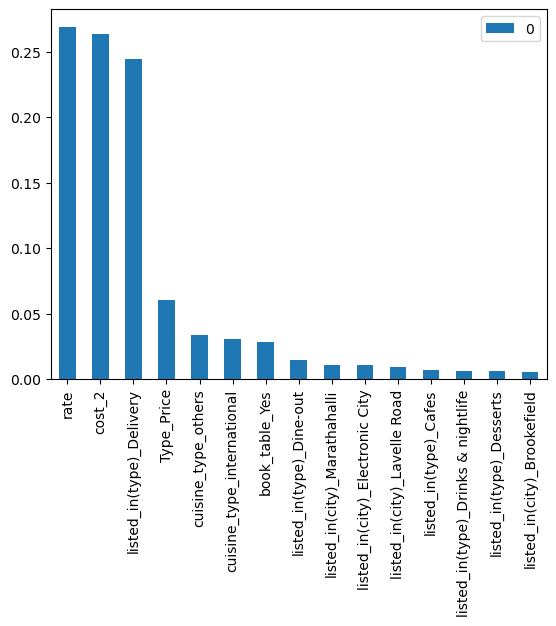

In [283]:
imp_features.plot(kind ='bar')

In [1]:
# for this problem we can see that rating is the most important factor predicting whether the order will be online or not
#followed by cost_2 price
#list_delivery if the order is not list_delivery then less people will try to book it online
#type_price which indicates the category of restarunt based on type
#cusine type others is more import than international nd indian 
#out of places most of the orders might be going around marathahli followed by electronic city
# so zomato must foccus on the increasing rating  and give discount on cost of fooods
#and should increase the number of listed_deliveries


In [284]:
imp_features.index

Index(['rate', 'cost_2', 'listed_in(type)_Delivery', 'Type_Price',
       'cuisine_type_others', 'cuisine_type_international', 'book_table_Yes',
       'listed_in(type)_Dine-out', 'listed_in(city)_Marathahalli',
       'listed_in(city)_Electronic City', 'listed_in(city)_Lavelle Road',
       'listed_in(type)_Cafes', 'listed_in(type)_Drinks & nightlife',
       'listed_in(type)_Desserts', 'listed_in(city)_Brookefield'],
      dtype='object')

In [ ]:
gb

In [285]:
fpr,tpr,th = metrics.roc_curve(ytest,gb_classifier.predict_proba(xt)[:,1])

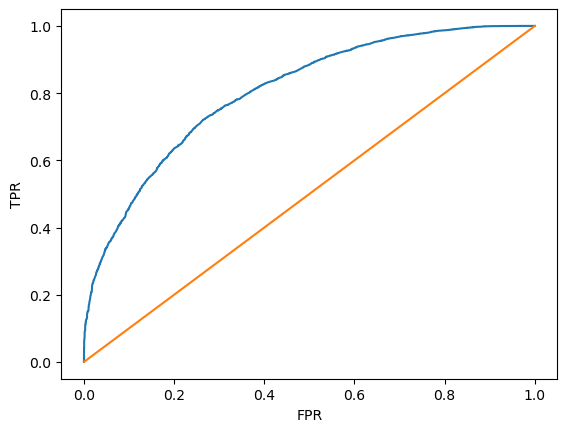

In [288]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [290]:
metrics.roc_auc_score(ytest,gb_classifier.predict_proba(xt)[:,1])

0.8049807822127246